Loading the data

In [ ]:
import zipfile
import os
import pandas as pd
import seaborn as sns

# Paths
zip_file_path = r'C:\Users\adminepk.AD01\Downloads\archive.zip'
extract_dir = r'C:\Users\adminepk.AD01\Downloads\extracted_data'

# Extract files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Load CSV files
csv_files = [os.path.join(extract_dir, file) for file in os.listdir(extract_dir) if file.endswith('.csv')]

# Read each CSV into a DataFrame
dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}

# Access the DataFrames by their file names
df1 = dfs[os.path.basename(csv_files[0])]
df2 = dfs[os.path.basename(csv_files[1])]

# Display the first few rows of both DataFrames
df1.head(), df2.head()


(   Unnamed: 0 h_a        xG       xGA      npxG     npxGA  deep  deep_allowed  \
 0           1   h  2.234560  0.842407  2.234560  0.842407    11             5   
 1           2   a  0.842407  2.234560  0.842407  2.234560     5            11   
 2           3   a  3.183770  1.200300  2.422640  1.200300     9             1   
 3           4   h  1.200300  3.183770  1.200300  2.422640     1             9   
 4           5   h  1.340990  1.598640  1.340990  1.598640     4             6   
 
    scored  missed  ...  AF.x AC.x AY.x  AR.x  B365H.x  B365D.x  B365A.x  \
 0       4       1  ...     9    2    2     0     1.14     10.0    19.00   
 1       1       4  ...     9    2    2     0     1.14     10.0    19.00   
 2       5       0  ...    13    1    2     0    12.00      6.5     1.22   
 3       0       5  ...    13    1    2     0    12.00      6.5     1.22   
 4       1       1  ...    19    4    1     0     1.95      3.6     3.60   
 
    HtrgPerc  AtrgPerc  matchDay  
 0  0.466667 

Add Followers field

In [ ]:
# Get unique values in the 'teamid' column
unique_values = df1['teamId'].unique()

# Print the unique values
print(unique_values)

['Liverpool' 'Norwich' 'Man City' 'West Ham' 'Bournemouth' 'Brighton'
 'Burnley' 'Crystal Palace' 'Everton' 'Sheffield United' 'Southampton'
 'Watford' 'Aston Villa' 'Tottenham' 'Arsenal' 'Leicester'
 'Newcastle United' 'Wolves' 'Chelsea' 'Man Utd']


In [ ]:
instagram_followers = {
    'Liverpool': 45500000,
    'Norwich': 508000,
    'Man City': 54500000,
    'West Ham': 4500000,
    'Bournemouth': 978000,
    'Brighton': 2200000,
    'Burnley': 694000,
    'Crystal Palace': 2100000,
    'Everton': 3100000,
    'Sheffield United': 719000,
    'Southampton': 1400000,
    'Watford': 1100000,
    'Aston Villa': 3900000,
    'Tottenham': 17000000,
    'Arsenal': 29700000,
    'Leicester': 7900000,
    'Newcastle United': 2800000,
    'Wolves': 2900000,
    'Chelsea': 42100000,
    'Man Utd': 64200000
}
df1['instagram_followers'] = df1['teamId'].map(instagram_followers)



Cleaning of both datasets

In [ ]:
# Check for missing values in each column
missing_values = df1.isnull().sum()
missing_values


Unnamed: 0             0
h_a                    0
xG                     0
xGA                    0
npxG                   0
npxGA                  0
deep                   0
deep_allowed           0
scored                 0
missed                 0
xpts                   0
result                 0
date                   0
wins                   0
draws                  0
loses                  0
pts                    0
npxGD                  0
teamId                 0
ppda_cal               0
allowed_ppda           0
matchtime              0
tot_points             0
round                  0
tot_goal               0
tot_con                0
Referee.x              0
HS.x                   0
HST.x                  0
HF.x                   0
HC.x                   0
HY.x                   0
HR.x                   0
AS.x                   0
AST.x                  0
AF.x                   0
AC.x                   0
AY.x                   0
AR.x                   0
B365H.x                0


In [ ]:
missing_values = df2.isnull().sum()
missing_values

Unnamed: 0           0
assists              0
bonus                0
bps                  0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
kickoff_time         0
minutes              0
opponent_team        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
full                 0
team                 0
ppm                  0
dtype: int64

Analyzing how the teams play


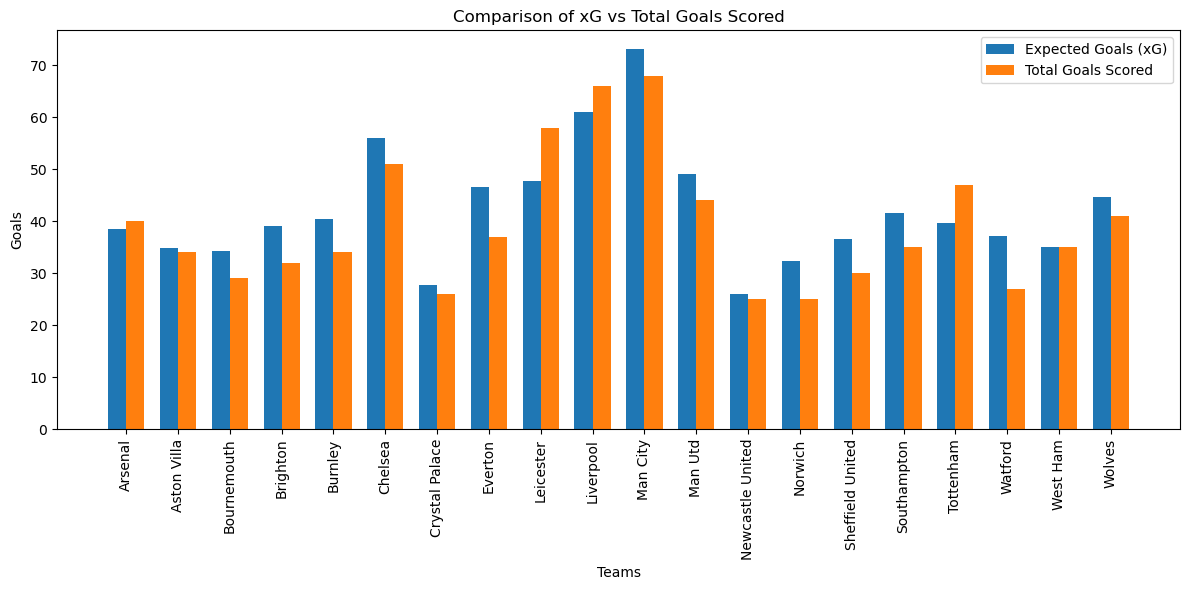

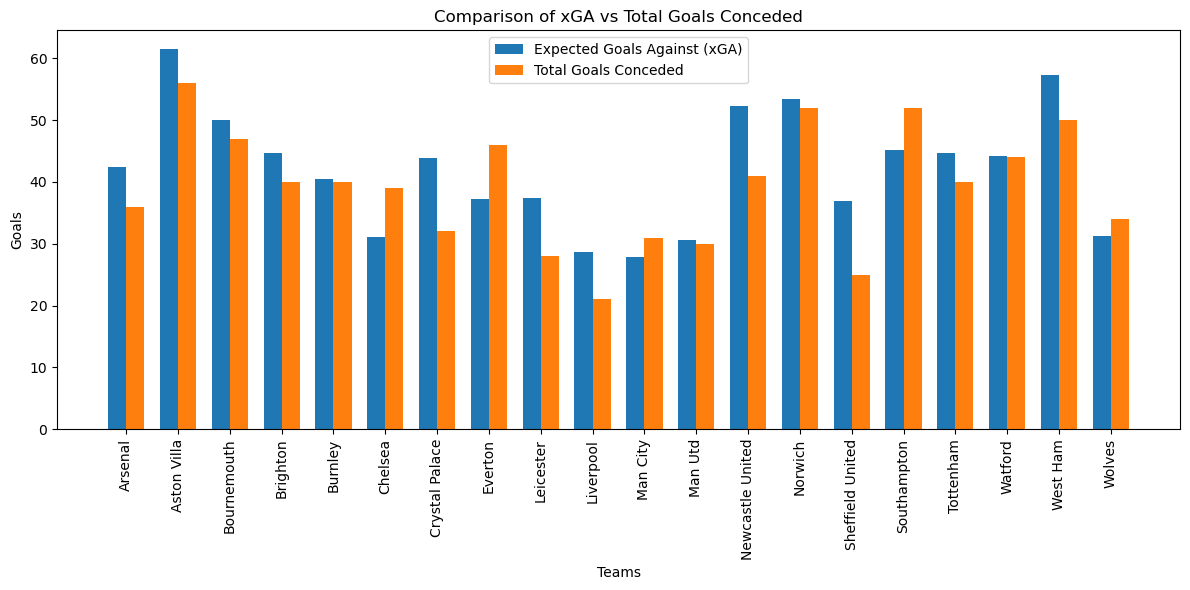

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
team_performance = df1.groupby('teamId').agg({
    'xG': 'sum',
    'xGA': 'sum',
    'scored': 'sum',
    'missed': 'sum'
}).reset_index()
team_performance['xG_diff'] = team_performance['scored'] - team_performance['xG']
team_performance['xGA_diff'] = team_performance['missed'] - team_performance['xGA']
# Set the width of the bars
bar_width = 0.35
index = np.arange(len(team_performance['teamId']))

# Bar graph for xG vs Total Goals Scored
plt.figure(figsize=(12, 6))
plt.bar(index, team_performance['xG'], bar_width, label='Expected Goals (xG)')
plt.bar(index + bar_width, team_performance['scored'], bar_width, label='Total Goals Scored')

plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Comparison of xG vs Total Goals Scored')
plt.xticks(index + bar_width / 2, team_performance['teamId'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Bar graph for xGA vs Goals Conceded
plt.figure(figsize=(12, 6))
plt.bar(index, team_performance['xGA'], bar_width, label='Expected Goals Against (xGA)')
plt.bar(index + bar_width, team_performance['missed'], bar_width, label='Total Goals Conceded')

plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Comparison of xGA vs Total Goals Conceded')
plt.xticks(index + bar_width / 2, team_performance['teamId'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()






In [ ]:
# Create a new column for shots based on whether the team was home or away
df1['shots'] = df1.apply(lambda row: row['HS.x'] if row['h_a'] == 'h' else row['AS.x'], axis=1)
# Initialize an empty dictionary to store correlations for each team
team_correlations = {}

# Group by 'teamId' and calculate correlation for each team
for team, group in df1.groupby('teamId'):
    correlation = group['deep'].corr(group['shots'])
    team_correlations[team] = correlation
    print(f"Team ID: {team} - Correlation between deep passes and shots: {correlation}")

# Convert the dictionary to a DataFrame for easier visualization
correlation_df = pd.DataFrame(list(team_correlations.items()), columns=['teamId', 'correlation'])


Team ID: Arsenal - Correlation between deep passes and shots: 0.6264088330240375
Team ID: Aston Villa - Correlation between deep passes and shots: 0.6668022935632455
Team ID: Bournemouth - Correlation between deep passes and shots: 0.2963227033255523
Team ID: Brighton - Correlation between deep passes and shots: 0.48935202335830197
Team ID: Burnley - Correlation between deep passes and shots: 0.6890341610543685
Team ID: Chelsea - Correlation between deep passes and shots: 0.38191083422909616
Team ID: Crystal Palace - Correlation between deep passes and shots: 0.6984566274288251
Team ID: Everton - Correlation between deep passes and shots: 0.21035884829860416
Team ID: Leicester - Correlation between deep passes and shots: 0.6777622292363816
Team ID: Liverpool - Correlation between deep passes and shots: 0.4316658371859559
Team ID: Man City - Correlation between deep passes and shots: 0.61839430793153
Team ID: Man Utd - Correlation between deep passes and shots: 0.34318149618551963
Team 

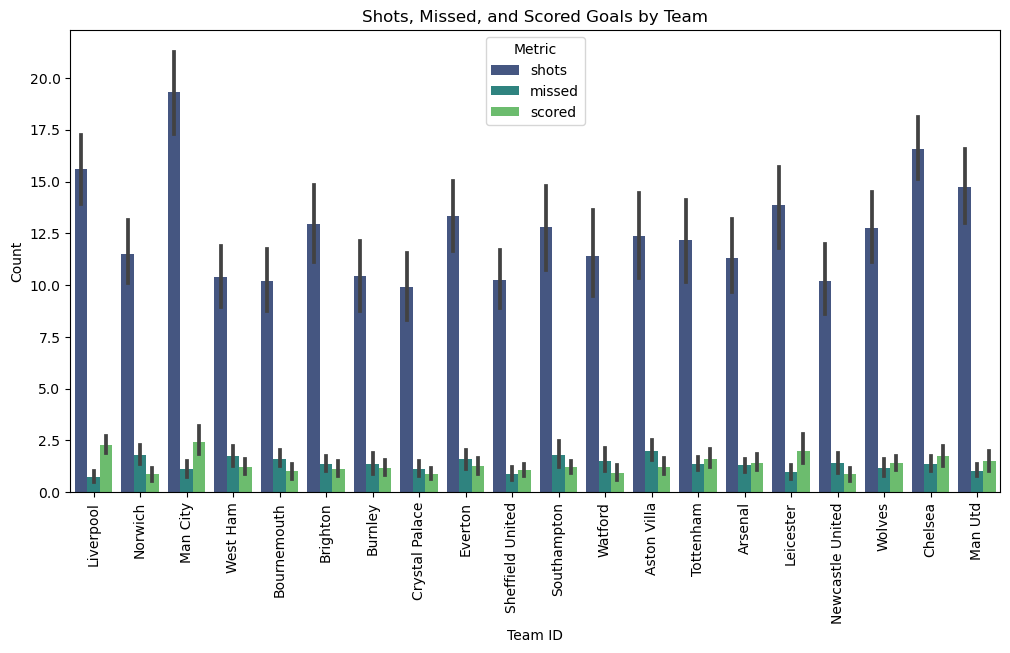

In [ ]:
# Melt the DataFrame to long format
melted_df = df1.melt(id_vars='teamId', value_vars=['shots', 'missed', 'scored'], 
                         var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='teamId', y='Value', hue='Metric', data=melted_df, palette='viridis')
plt.title('Shots, Missed, and Scored Goals by Team')
plt.xlabel('Team ID')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()


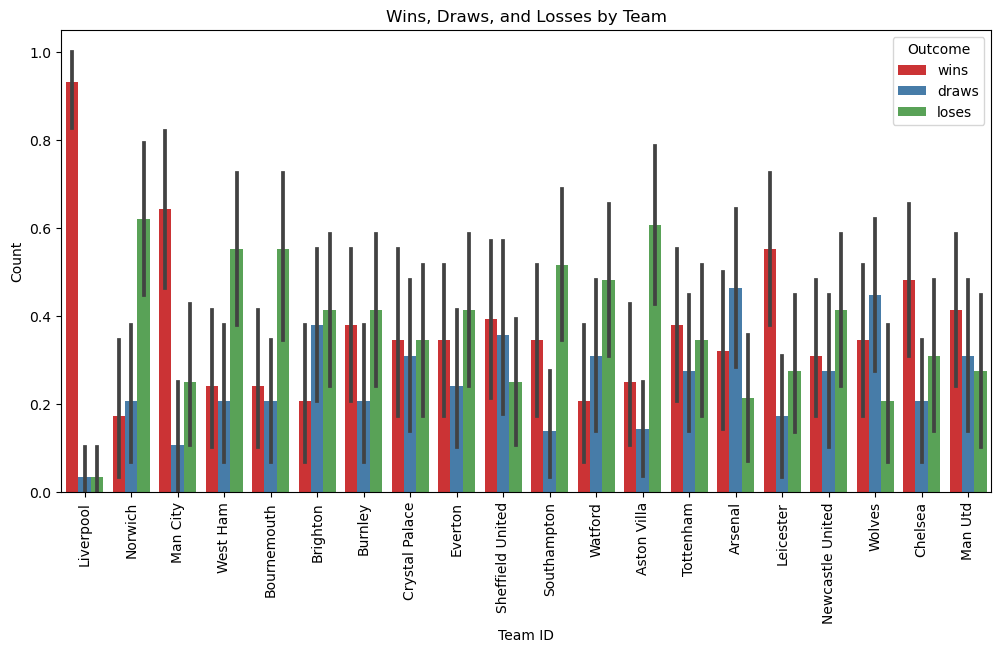

In [ ]:
# Melt the DataFrame to long format
melted_df = df1.melt(id_vars='teamId', value_vars=['wins', 'draws', 'loses'], 
                         var_name='Outcome', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='teamId', y='Count', hue='Outcome', data=melted_df, palette='Set1')
plt.title('Wins, Draws, and Losses by Team')
plt.xlabel('Team ID')
plt.ylabel('Count')

# Rotate the x-axis labels to vertical
plt.xticks(rotation=90)

plt.show()

Teams following on social media

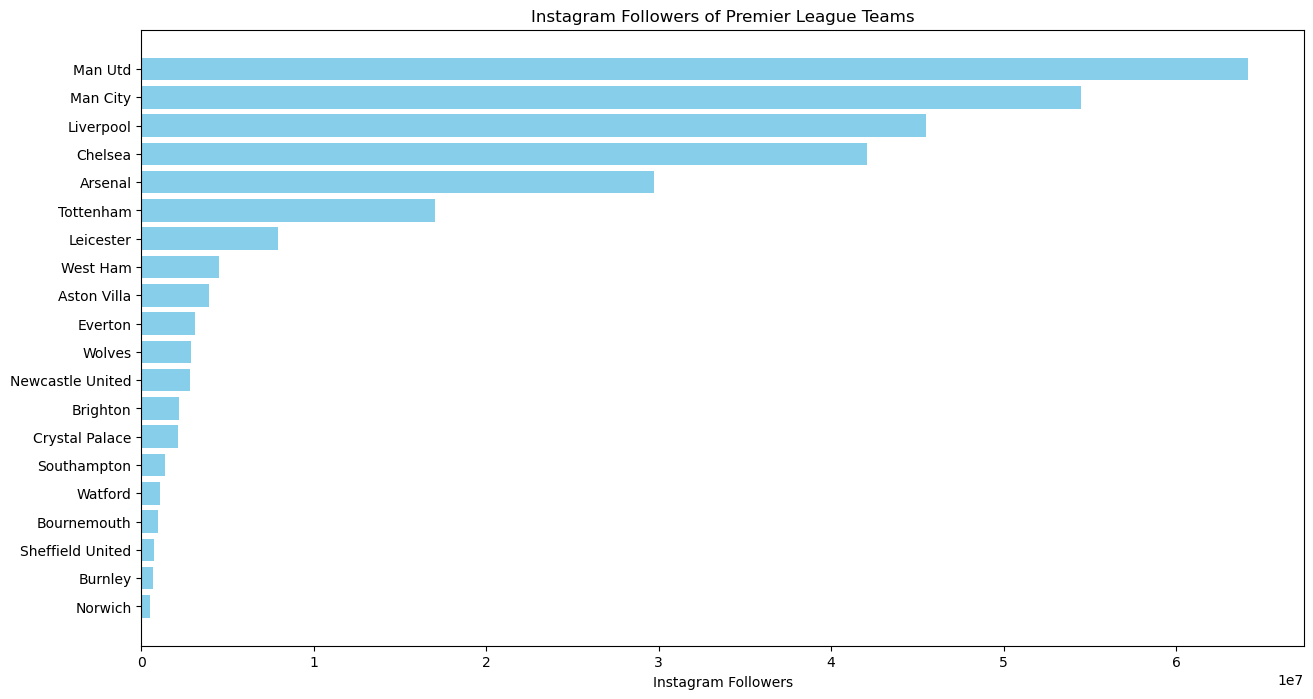

In [ ]:
# df1 contains the team names and their corresponding Instagram followers
df1['instagram_followers'] = df1['teamId'].map(instagram_followers)

# Group by team and get the Instagram followers for visualization
followers_df = df1[['teamId', 'instagram_followers']].drop_duplicates()

# Sort the teams by followers for better visualization
followers_df = followers_df.sort_values('instagram_followers', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
plt.barh(followers_df['teamId'], followers_df['instagram_followers'], color='skyblue')
plt.xlabel('Instagram Followers')
plt.title('Instagram Followers of Premier League Teams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest followers at the top
plt.show()


Finding the Most Valuable Players per team

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Select relevant columns for the analysis
relevant_columns = ['team', 'full', 'goals_scored', 'goals_conceded', 
                    'minutes', 'clean_sheets', 'assists', 'threat','creativity','influence']
df3 = df2[relevant_columns]

# Normalize the metrics
scaler = MinMaxScaler()
df3[['goals_scored', 'goals_conceded', 'minutes', 'clean_sheets', 'assists', 'threat','creativity','influence']] = scaler.fit_transform(
    df3[['goals_scored', 'goals_conceded', 'minutes', 'clean_sheets', 'assists', 'threat','creativity','influence']]
)

# Create a composite score (you can adjust weights if needed)
df3['composite_score'] = (
    df3['goals_scored'] + 
    (1 - df3['goals_conceded']) +  # Subtracting because conceding more is worse
    df3['minutes'] + 
    df3['clean_sheets'] + 
    df3['assists'] + 
    df3['threat'] +
    df3['creativity'] +
    df3['influence']
)

# Sort by team and composite score
df3 = df3.sort_values(['team', 'composite_score'], ascending=[True, False])

# Drop duplicate players to ensure each player is unique
df3 = df3.drop_duplicates(subset=['full'])

# Get top 2 players per team based on composite score
top_2_players_per_team = df3.groupby('team').head(2)

# Select relevant columns for clarity
top_2_players_per_team = top_2_players_per_team[['team', 'full', 'composite_score']]

# Display the result as a table
top_2_players_per_team.reset_index(drop=True, inplace=True)
print(top_2_players_per_team)


                team                           full  composite_score
0            Arsenal                   Nicolas P?p?         5.160086
1            Arsenal      Pierre-Emerick Aubameyang         4.859916
2        Aston Villa                  Jack Grealish         4.438198
3        Aston Villa                Conor Hourihane         4.401962
4        Bournemouth                    Dan Gosling         4.153993
5        Bournemouth                    Joshua King         3.998000
6           Brighton                 Aaron Connolly         4.634715
7           Brighton                     Aaron Mooy         4.250722
8            Burnley                     Chris Wood         4.725292
9            Burnley                James Tarkowski         4.484207
10           Chelsea        Willian Borges Da Silva         4.831042
11           Chelsea                   Ross Barkley         4.775577
12    Crystal Palace                  Wilfried Zaha         4.324062
13    Crystal Palace            Pa

C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_31236\80171632.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['goals_scored', 'goals_conceded', 'minutes', 'clean_sheets', 'assists', 'threat','creativity','influence']] = scaler.fit_transform(
C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_31236\80171632.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['composite_score'] = (


In [ ]:
# Create a new DataFrame with only the top 2 players per team
top_players_df = top_2_players_per_team.reset_index(drop=True)
top_players_df

,team,full,composite_score
0,Arsenal,Nicolas P?p?,5.160086
1,Arsenal,Pierre-Emerick Aubameyang,4.859916
2,Aston Villa,Jack Grealish,4.438198
3,Aston Villa,Conor Hourihane,4.401962
4,Bournemouth,Dan Gosling,4.153993
5,Bournemouth,Joshua King,3.998000
6,Brighton,Aaron Connolly,4.634715
7,Brighton,Aaron Mooy,4.250722
8,Burnley,Chris Wood,4.725292
9,Burnley,James Tarkowski,4.484207


Players with the most engagement

In [ ]:
# List of engagement metrics to add
engagement_metrics = ['transfers_balance','transfers_out', 'transfers_in', 'ppm', 'value']

# Check if these columns exist in your original dataset
engagement_df = df2[['team', 'full'] + engagement_metrics]

# Merge the engagement metrics with the top players DataFrame
top_players_engagement_df = pd.merge(top_players_df, engagement_df, on=['team', 'full'], how='left')

top_players_engagement_df['transfers_out'] = 1 - top_players_engagement_df['transfers_out']


# Normalize the engagement metrics
scaler = MinMaxScaler()
top_players_engagement_df[engagement_metrics] = scaler.fit_transform(top_players_engagement_df[engagement_metrics])





In [ ]:
# Group by 'team' and 'full' to sum all engagement metrics for each player across all matches
top_players_engagement_df = top_players_engagement_df.groupby(['team', 'full'], as_index=False)[engagement_metrics].sum()

# Create a composite engagement score after summing the metrics
top_players_engagement_df['engagement_score'] = (
    top_players_engagement_df['transfers_balance'] +
    top_players_engagement_df['transfers_in'] +
    top_players_engagement_df['transfers_out']+
    top_players_engagement_df['ppm'] +
    top_players_engagement_df['value']
)

# Sort players by the total engagement score
top_players_engagement_df = top_players_engagement_df.sort_values('engagement_score', ascending=False)

# Add a rank column based on the total engagement score
top_players_engagement_df['rank'] = top_players_engagement_df['engagement_score'].rank(ascending=False)


C:\Users\adminepk.AD01\AppData\Local\Temp\ipykernel_31236\2012960604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_engaged_players['player_label'] = top_10_engaged_players['full'] + ' (' + top_10_engaged_players['team'] + ')'


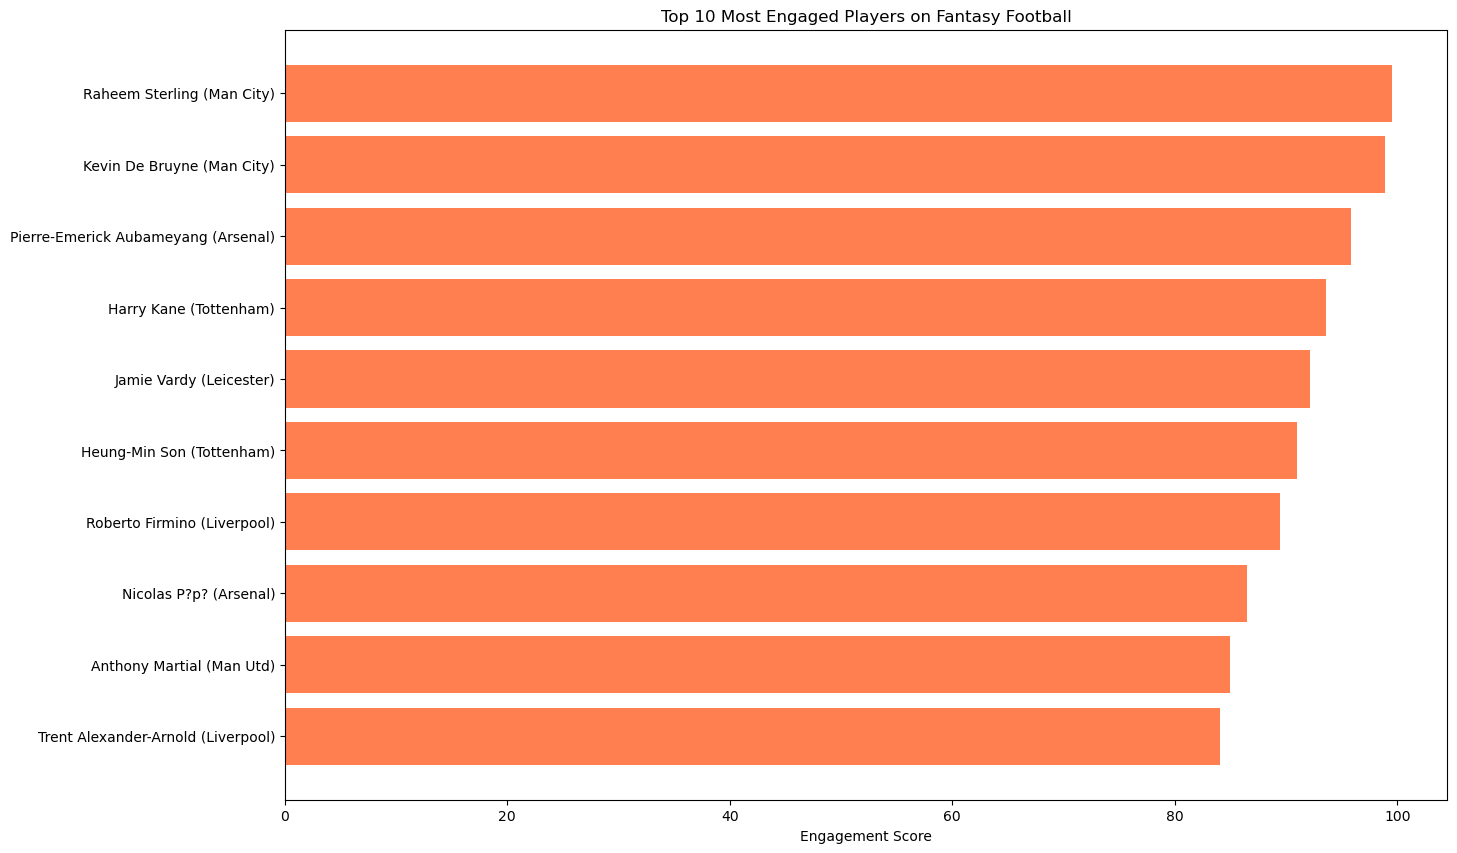

In [ ]:
# Sort the DataFrame by engagement score and select the top 10 players
top_10_engaged_players = top_players_engagement_df.head(10)

# Create unique labels by combining the player name and team
top_10_engaged_players['player_label'] = top_10_engaged_players['full'] + ' (' + top_10_engaged_players['team'] + ')'

# Plot the bar chart
plt.figure(figsize=(15, 10))
plt.barh(top_10_engaged_players['player_label'], top_10_engaged_players['engagement_score'], color='coral')
plt.xlabel('Engagement Score')
plt.title('Top 10 Most Engaged Players on Fantasy Football')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()



Building classification model

In [ ]:
result_counts = melted_df.pivot_table(
    index='teamId',               
    columns='Outcome',         
    values='Count',                
    aggfunc='sum',                 
    fill_value=0  
)
result_counts.columns = ['Losses', 'Draws', 'Wins']
result_counts = result_counts.reset_index()
result_counts_df = pd.DataFrame(result_counts)
team_performance_df = pd.DataFrame(team_performance)
result_counts_df




,teamId,Losses,Draws,Wins
0,Arsenal,13,6,9
1,Aston Villa,4,17,7
2,Bournemouth,6,16,7
3,Brighton,11,12,6
4,Burnley,6,12,11
5,Chelsea,6,9,14
6,Crystal Palace,9,10,10
7,Everton,7,12,10
8,Leicester,5,8,16
9,Liverpool,1,1,27


In [ ]:
new_df = pd.merge(result_counts_df, team_performance_df, on='teamId', how='inner')
new_df = pd.merge(new_df, followers_df, on='teamId', how='inner')
new_df

,teamId,Losses,Draws,Wins,xG,xGA,scored,missed,xG_diff,xGA_diff,instagram_followers
0,Arsenal,13,6,9,38.410292,42.428781,40,36,1.589708,-6.428781,29700000
1,Aston Villa,4,17,7,34.810489,61.467779,34,56,-0.810489,-5.467779,3900000
2,Bournemouth,6,16,7,34.231331,49.963806,29,47,-5.231331,-2.963806,978000
3,Brighton,11,12,6,39.025318,44.617103,32,40,-7.025318,-4.617103,2200000
4,Burnley,6,12,11,40.366882,40.527359,34,40,-6.366882,-0.527359,694000
5,Chelsea,6,9,14,56.091577,31.137553,51,39,-5.091577,7.862447,42100000
6,Crystal Palace,9,10,10,27.758932,43.837602,26,32,-1.758932,-11.837602,2100000
7,Everton,7,12,10,46.579852,37.236657,37,46,-9.579852,8.763343,3100000
8,Leicester,5,8,16,47.772301,37.430000,58,28,10.227699,-9.430000,7900000
9,Liverpool,1,1,27,61.027651,28.689374,66,21,4.972349,-7.689374,45500000


In [ ]:
top_players_engagement_scores = top_players_engagement_df.groupby('team', as_index=False)['engagement_score'].sum()
top_players_engagement_scores

,team,engagement_score
0,Arsenal,182.334339
1,Aston Villa,148.899453
2,Bournemouth,139.235947
3,Brighton,128.354942
4,Burnley,147.343460
5,Chelsea,150.180095
6,Crystal Palace,147.253128
7,Everton,156.089920
8,Leicester,164.234750
9,Liverpool,173.474531


In [ ]:
final_df = pd.merge(new_df, top_players_engagement_scores, left_on='teamId', right_on='team', how='inner')
final_df=final_df.drop(columns=['team'])
final_df = final_df.rename(columns={'engagement_score': 'top_players_interaction_points'})
final_df

,teamId,Losses,Draws,Wins,xG,xGA,scored,missed,xG_diff,xGA_diff,instagram_followers,top_players_interaction_points
0,Arsenal,13,6,9,38.410292,42.428781,40,36,1.589708,-6.428781,29700000,182.334339
1,Aston Villa,4,17,7,34.810489,61.467779,34,56,-0.810489,-5.467779,3900000,148.899453
2,Bournemouth,6,16,7,34.231331,49.963806,29,47,-5.231331,-2.963806,978000,139.235947
3,Brighton,11,12,6,39.025318,44.617103,32,40,-7.025318,-4.617103,2200000,128.354942
4,Burnley,6,12,11,40.366882,40.527359,34,40,-6.366882,-0.527359,694000,147.343460
5,Chelsea,6,9,14,56.091577,31.137553,51,39,-5.091577,7.862447,42100000,150.180095
6,Crystal Palace,9,10,10,27.758932,43.837602,26,32,-1.758932,-11.837602,2100000,147.253128
7,Everton,7,12,10,46.579852,37.236657,37,46,-9.579852,8.763343,3100000,156.089920
8,Leicester,5,8,16,47.772301,37.430000,58,28,10.227699,-9.430000,7900000,164.234750
9,Liverpool,1,1,27,61.027651,28.689374,66,21,4.972349,-7.689374,45500000,173.474531


In [ ]:
# Threshold values
instagram_threshold = final_df['instagram_followers'].median()
interaction_points_threshold = final_df['top_players_interaction_points'].median() 
wins_threshold = final_df['Wins'].quantile(0.65) 
goals_scored_threshold = final_df['scored'].quantile(0.95)
xG_threshold = final_df['xG'].quantile(0.95)
losses_threshold = final_df['Losses'].quantile(0.35)

# Create a binary target variable based on the thresholds
final_df['advertisement_value'] = (
    (final_df['instagram_followers'] > instagram_threshold) & 
    (final_df['top_players_interaction_points'] > interaction_points_threshold) & 
    (final_df['Wins'] > wins_threshold) & 
    (final_df['scored'] > goals_scored_threshold) &
    (final_df['xG'] > xG_threshold)&
    (final_df['Losses'] <= losses_threshold)
).astype(int)


c:\Users\adminepk.AD01\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\adminepk.AD01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\adminepk.AD01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\adminepk.AD01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and bei

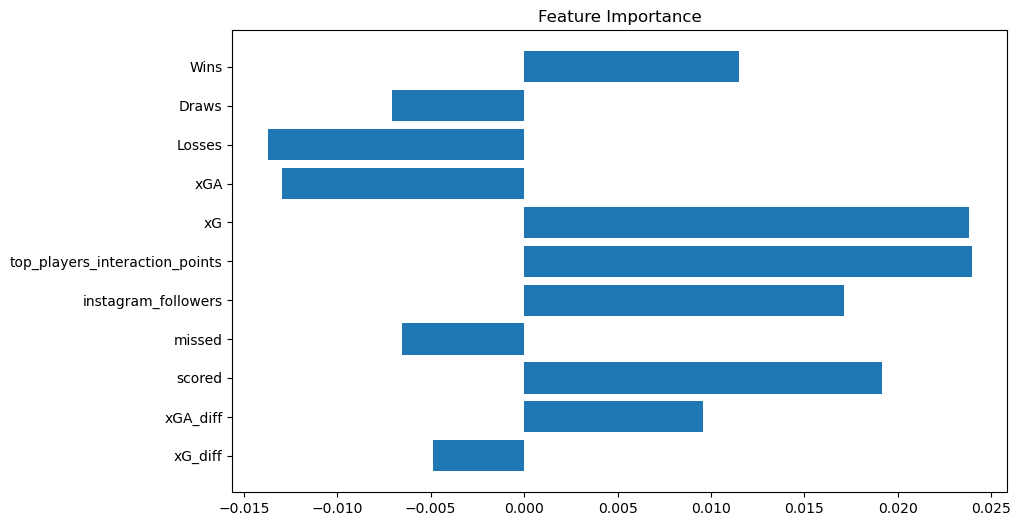

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Perform a non-stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
])

# Hyperparameter tuning with stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)
param_grid = {'logistic__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)


# Feature importance
coef = best_model.named_steps['logistic'].coef_[0]
plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.title('Feature Importance')
plt.show()


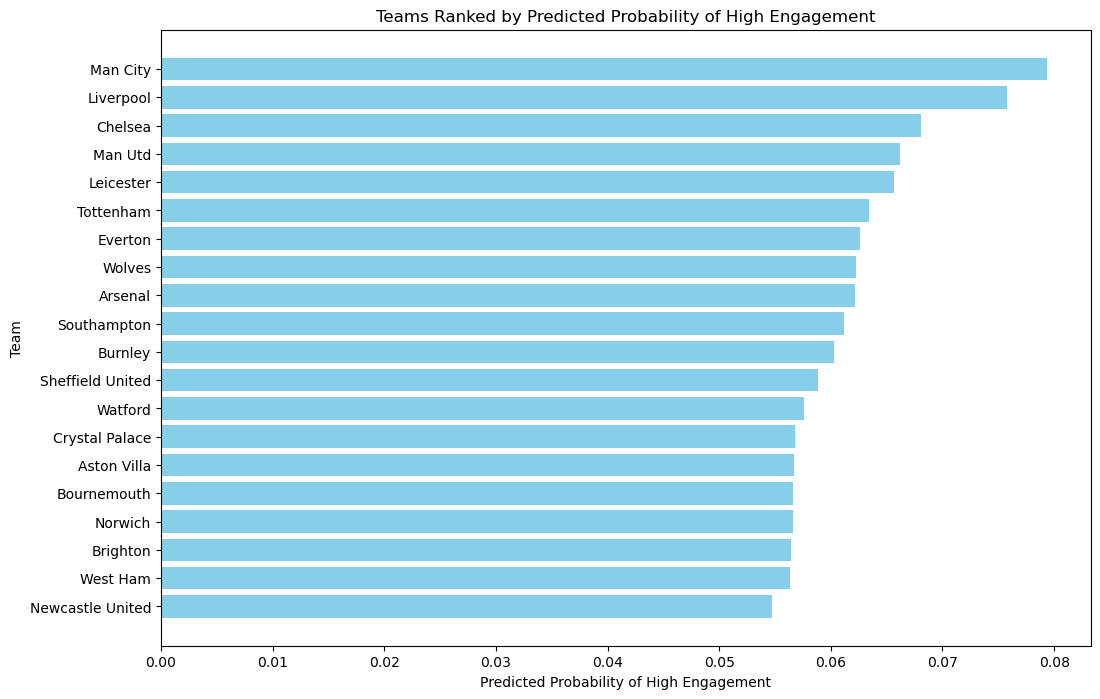

In [ ]:
import matplotlib.pyplot as plt

# Predict probabilities for the entire dataset (X)
y_prob = best_model.predict_proba(X)[:, 1]

# Add the predicted probabilities to the final_df DataFrame
final_df['predicted_probability'] = y_prob

# Sort teams by predicted probability of high engagement
sorted_df = final_df.sort_values(by='predicted_probability', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_df['teamId'], sorted_df['predicted_probability'], color='skyblue')
plt.xlabel('Predicted Probability of High Engagement')
plt.ylabel('Team')
plt.title('Teams Ranked by Predicted Probability of High Engagement')
plt.gca().invert_yaxis()  # Invert y-axis to show the team with the highest probability at the top
plt.show()

